En este programa se calculará el valor del estadístoco CHi cuadrado para comparar datos observados con los asociados a un modelo. Luego se harán pruebas de hipótesis

---------
El código primero crea los datos que siguen la distribución binomial con numpy y luego define la función que calculará el chi cuadrado y el p-value. Por último, en esta primera parte, se define una función para hacer el test de hipótesis

Luego comparo con gaussianas con distinta media. Pero acá tengo que discretizar los valores pués tengo que comparar frecuencias relativas de números enteros y la distribución gaussiana puede dar números reales. Usaré la función np.round()

Por último hago el test con otra distribución binomial

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
plt.style.use('dark_background')

In [3]:
# Realizo 100 observaciones que sigan la distribución binomial
O = np.random.binomial(n=10, p=0.4, size=100) 
df = 10 # Grados de libertad. Número de valores que toma la variable menos
# La restricción de que la suma de las frecuencias da 1

In [4]:
# Creo la función Chi cuadrado
def Chi_squareB(O):
    """ Devuelve el valor de Chi cuadrado para una binomial con parámetros n=10, p=0.4
    
    Parameters
    ----------
    O : list
        Datos observados
    
    Returns
    -------
    Chi2 : .float
        Valor de Chi cuadrado
        
    """
    import numpy as np
    # Creo los datos según el modelo
    # Mientras más gránde tome el tamaño más se aproxima a el modelo
    # Notar que len(O) =! len(C)
    C = np.random.binomial(n=10, p=0.4, size=100000) #  Datos Calculados
    
    # Elementos únicos de los arreglos
    Unicos_O = np.unique(O)
    Unicos_C = np.unique(C)
    # Calculo sus frecuencias
    Frec_O = []
    Frec_C = []
    ij = 0
    while ij<len(Unicos_O): # Para compatibilizar uso el "Unicos_O" para calcular frecuencias
        Frec_O.append( np.count_nonzero(O==Unicos_O[ij])/len(O) )
        Frec_C.append( np.count_nonzero(C==Unicos_O[ij])/len(C) )
        ij = ij + 1
        
    # Calculo chi cuadrado
    DIF = np.array(Frec_O) - np.array(Frec_C) # Auxiliar
    Chi2 = np.sum( DIF**2/Frec_C ) # Calculo de chi cuadrado con frecuencias
    return Chi2

In [5]:
# Creo la función Chi cuadrado
def Chi_squareB(O):
    """ Devuelve el valor de Chi cuadrado para una binomial con parámetros n=10, p=0.4
    
    Parameters
    ----------
    O : list
        Datos observados
    
    Returns
    -------
    Chi2 : .float
        Valor de Chi cuadrado
        
    """
    import numpy as np
    import scipy.stats as st
    # Creo los datos según el modelo
    C = np.random.binomial(n=10, p=0.4, size=100000) #  Datos Calculados
    
    # Calculo sus frecuencias
    Frec = []
    Frec_T = [] # Frecuencias teóricas
    ij = 0
    while ij<10: # n=10 
        Frec.append( np.count_nonzero(O==ij)/len(O) )
        Frec_T.append( st.binom.pmf(ij, n=10, p=0.4) )
        ij = ij + 1

    # Calculo chi cuadrado
    OC = np.array(Frec) - np.array(Frec_T) # Auxiliar
    Chi2 = np.sum( OC**2/Frec_T ) # Calculo de chi cuadrado con frecuencias
    p_value = st.chisquare(Frec, Frec_T)[1] # No lo pude programar... ¿Cómo se hace?
    return Chi2, p_value

In [6]:
# Prueba de hipótesis:
def Hip(Chi2, alpha, df):
    """ Devuelve el resultado de la prueba de hipótesis para el test chi cuadrado
    
    Parameters
    ----------
    Chi2 : .float
        Valor de Chi cuadrado calculado. Real positivo
    alpha : .float
        Nivel de significancia
    df : int
        Grados de libertad
    
    Returns
    -------
    bool
        True si se aceptó la hipotesis nula, False si no
        
    Notas
    -----
    La hipótesis nula es que los datos sean compatibles con el modelo
        
    """
    # Errores
    if df<0:
        raise ValueError('Error: el grado de libertad debe ser un entero mayor a cero')
    if alpha<0 or alpha>1:
        raise ValueError('Error: alpha en un número real en el intervalo (0,1)')
    if Chi2<=0:
        raise ValueError('Error: El valor de Chi2 debe ser un real positivo (no cero)')
    # -------
    import numpy as np
    from scipy.stats import chi2
    # Busco el valor crítico de chi cuadrado
    Chi2_critico = chi2.ppf(1-alpha, df)
    # Aplico la condición
    if Chi2<Chi2_critico: # Condición para aceptar la hipótesis nula
        return True
    else:
        return False

In [7]:
Test = Hip(Chi_squareB(O)[0], 0.99, df=df)
Test

True

## Ahora comparo con gaussianas

In [8]:
# Crearé gaussianas y calcularé cos estadíscitos todo en un mismo loop
grilla = np.linspace(2, 7, 100) # Grilla de valores para la media de las gaussianas
Mu = [] # C
P_values= []
Hip_test = []
for medias in grilla:
    Mu.append(medias)
    Datos = np.round( np.random.normal(loc=medias, scale=2.5, size=100) )
    grado_lib = max(Datos)-min(Datos)-1 # Lo estimo
    P_values.append( Chi_squareB(Datos)[1] )
    
    # Test de hipótesis
    Aux = Hip( Chi2=Chi_squareB(Datos)[0], alpha=0.90, df=grado_lib )
    if Aux==True:
        Hip_test.append(1)
    else:
        Hip_test.append(0)

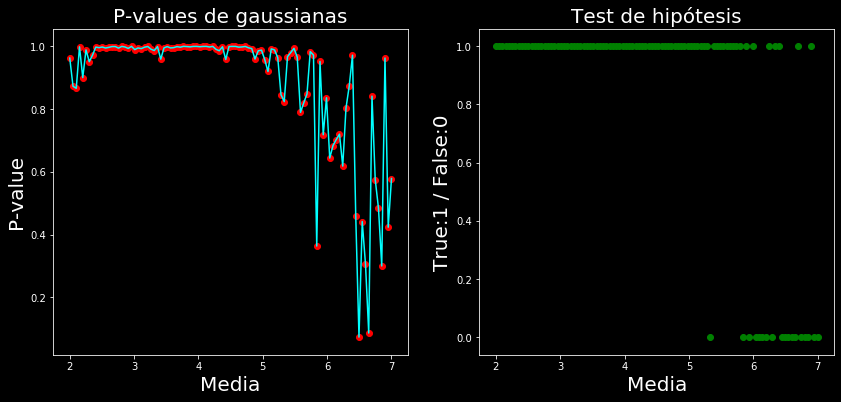

In [9]:
# Graficos
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].scatter(Mu, P_values, color='red');
ax[0].plot(Mu, P_values, color='cyan');
ax[1].scatter(Mu, Hip_test, color='green');

ax[0].set_title('P-values de gaussianas', fontsize=20)
ax[0].set_ylabel('P-value', fontsize=20)
ax[0].set_xlabel('Media', fontsize=20)
ax[1].set_title('Test de hipótesis', fontsize=20)
ax[1].set_ylabel('True:1 / False:0', fontsize=20)
ax[1].set_xlabel('Media', fontsize=20);

La conclusión es que se pueden confundir las gaussianas con medias cerca de 7, lo veré en un gráfico:

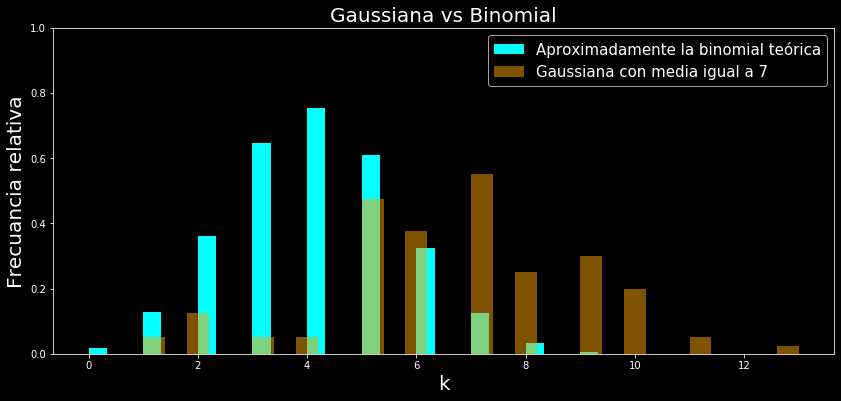

In [10]:
# Genero valores para la binomial teórica y la gaussiana
Gaussiana =  np.round( np.random.normal(loc=7, scale=2.5, size=100) )
Binomial = np.random.binomial(n=10, p=0.4, size=100000) # Equivale a la distribuc. teórica

fig, ax = plt.subplots(1, 1, figsize = (14,6))

ax.hist(Binomial, color='cyan', density=True, bins=30, 
        label='Aproximadamente la binomial teórica')
ax.hist(Gaussiana, color='orange', density=True, alpha=0.5, bins=30,
        label='Gaussiana con media igual a 7');

ax.set_title('Gaussiana vs Binomial', fontsize=20)
ax.set_ylabel('Frecuancia relativa', fontsize=20)
ax.set_xlabel('k', fontsize=20)
ax.set_ylim(0,1)
ax.legend(fontsize=15);

No me sale muy bien alinear los bines. Las distribuciones no se ven muy similares cualitativamente...

## Muestra binomial de 1000 valores

In [11]:
O2 = np.random.binomial(n=1000, p=0.4, size=10000) 

In [12]:
print('Los valores de chi cuadrado y del p-value son:', Chi_squareB(O2) )
print('El resultado de la prueba de hipótesis es:',
      Hip( Chi2=Chi_squareB(O2)[0], alpha=0.90, df=1000) )

Los valores de chi cuadrado y del p-value son: (0.9998951424000008, 0.999437744302394)
El resultado de la prueba de hipótesis es: True


# Todavia tengo problemas con el p-value, me sigue dando p-value~1 y la hipótesis nula se acepta, lo cual no tiene sentido, no sé dónde está el error